In [2]:
import random
import math
import numpy as np
def sed(x,y): # square of euclidean distance
    dist=0
    for i in range(len(x)):
        dist = dist + (x[i]-y[i])*(x[i]-y[i])
    return dist
def sad(x,y): # simple addition of vectors
        v=[]
        for i in range(len(x)):
                v.append(x[i]+y[i])
        return v
f1=open("podaci005.txt", "r")
f2=open("res005++.txt", "w")
noc=int(f1.readline()) # broj centara - 25
nopt=int(f1.readline()) # broj tocaka - 10000
dimpt=int(f1.readline()) # dimenzija tocaka - 15
noi=15 # broj iteracija
x=[]
for i in range(nopt):
    line=f1.readline() # citam jedan redak iz datoteke
    vector=line.split() # splittam redak u listu
    x.append(vector) # appendam listu u matricu
for i in range(nopt):
        for j in range(dimpt):
                x[i][j]=float(x[i][j])



cent=[]
for i in range(noc):
        ind=random.randint(0, nopt-1)
        cent.append(x[ind])


gid=[]
for i in range(nopt): # punim listu gid (=group indicator), da bih je poslije mogao samo mijenjati
        gid.append(0)

# main loop, repeated "noi" times
# stavi 800 iteracija za mali set
# stavi 50 iteracija za veliki set

k=0
lista = np.empty(50)
for temp in range(100
                  ,1,-2):
        
        print(temp)
        # odredjivanje clustera
        for i in range(nopt):
                c=sed(x[i],cent[0])
                for j in range(1, noc):
                    if(sed(x[i],cent[j])<c):
                        gid[i]=j
                        c=sed(x[i],cent[j])
        # kraj odredjivanja clustera
        # odredjivanje novih centara
        for i in range(noc):
                v=[]
                for j in range(dimpt):
                        v.append(0)
                cl_count=0
                for j in range(nopt):
                        if gid[j]==i:
                                cl_count=cl_count+1
                                v=sad(v,x[j])
                if cl_count>0:
                        for j in range(dimpt):
                                cent[i][j]=v[j]*1.0/cl_count
        # kraj odredjivanja novih centara
        # ispis u file
        obj=0
        for i in range(nopt):
                obj=obj+sed(x[i],cent[gid[i]])        
        f2.write(' %s %3d %20.10f \n' % ('iteration', temp, obj))
        counter=[]
        for i in range(noc):
            cnt = 0
            for j in gid:
                if(j == i):
                    cnt = cnt + 1
            counter.append(cnt)
                    
        print(counter)  
        
        lista[k] = obj
        k=k+1
f1.close()
f2.close()


100
[54, 119, 157, 254, 783, 365, 595, 448, 400, 203, 170, 730, 72, 867, 1255, 62, 266, 400, 111, 400, 932, 427, 372, 137, 421]
98
[1, 115, 207, 401, 801, 399, 799, 400, 400, 1, 169, 800, 105, 800, 1199, 95, 200, 400, 116, 400, 801, 400, 399, 192, 400]
96
[1, 118, 206, 401, 801, 399, 799, 400, 400, 1, 162, 800, 107, 800, 1199, 111, 182, 400, 120, 400, 801, 400, 399, 193, 400]
94
[1, 118, 212, 401, 801, 399, 799, 400, 400, 1, 157, 800, 112, 800, 1199, 119, 169, 400, 125, 400, 801, 400, 399, 187, 400]
92
[1, 114, 216, 401, 801, 399, 799, 400, 400, 1, 161, 800, 119, 800, 1199, 122, 159, 400, 125, 400, 801, 400, 399, 183, 400]
90
[1, 109, 219, 401, 801, 399, 799, 400, 400, 1, 157, 800, 122, 800, 1199, 127, 151, 400, 134, 400, 801, 400, 399, 180, 400]
88
[1, 108, 220, 401, 801, 399, 799, 400, 400, 1, 156, 800, 125, 800, 1199, 126, 149, 400, 136, 400, 801, 400, 399, 179, 400]
86
[1, 109, 222, 401, 801, 399, 799, 400, 400, 1, 150, 800, 127, 800, 1199, 126, 147, 400, 141, 400, 801, 400, 399, 1

In [3]:
from sklearn.cluster import KMeans


f1=open("podaci005.txt", "r")
f2=open("res005++.txt", "w")
noc=int(f1.readline()) # broj centara - 25
nopt=int(f1.readline()) # broj tocaka - 10000
dimpt=int(f1.readline()) # dimenzija tocaka - 15
noi=15 # broj iteracija
x=[]
for i in range(nopt):
    line=f1.readline() # citam jedan redak iz datoteke
    vector=line.split() # splittam redak u listu
    x.append(vector) # appendam listu u matricu
for i in range(nopt):
        for j in range(dimpt):
                x[i][j]=float(x[i][j])


kmeans = KMeans(n_clusters=noc).fit(x)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
wcss=[]
for i in range(10, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

wcss

[1033495556.0798947,
 883472413.8482165,
 783476052.4161526,
 683493286.5829936,
 600158779.0099157,
 500169056.0507282,
 450148858.8469928,
 400150545.1069199,
 350130796.82928246,
 300133793.1470928,
 250149939.90386966,
 200127315.1963208,
 150138052.813854,
 100133634.54263009,
 50132405.53985499,
 149302.12311320292,
 148986.69044917263,
 148717.41675212234,
 148344.89389596749,
 147945.0387595544,
 147629.62733674192,
 147273.35601630545,
 146973.77565181817,
 146653.38008388545,
 146210.2736234468,
 145943.45355722954,
 145585.59555688198,
 145276.68677271367,
 144818.0513752449,
 144488.6414557163]

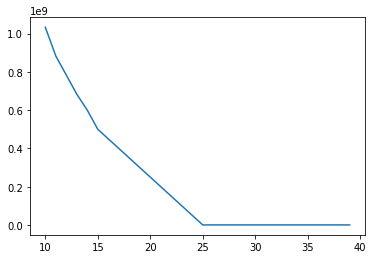

In [6]:
import matplotlib.pyplot as plt

br = range(10,40)
plt.plot(br, wcss)

In [7]:
from scipy import stats
vr=[]
for i in range(30):
    vr.append(i+10)

y=vr[:]

for i in range(30):
    y[i]=wcss[i]*vr[i]*vr[i]


MNK=stats.linregress(wcss,y)
a=MNK.slope
b=MNK.intercept
linereg=vr[:]
for i in range(10,40):
    linereg[i-10]=a/i + b/(i*i)



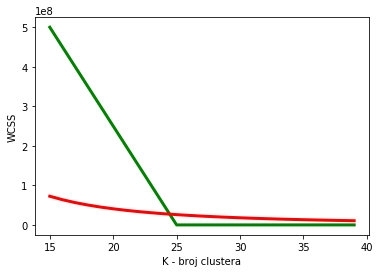

In [8]:
plt.plot(range(15,40), wcss[5:], color="g", linewidth="3")
plt.plot(range(15,40), linereg[5:], color="r", linewidth="3")
plt.xlabel("K - broj clustera")
plt.ylabel("WCSS")
plt.show()
